# Modelagem de Dispersão

Neste notebook vamos implementar um modelo de dispersão gaussiano

In [19]:
#Criando uma função do modelo gaussiano
import numpy as np

def modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H): # def usa para chamar novamente
    termo1 = qs/(2*np.pi*sigmaY*sigmaZ*u)
    termo2 = np.exp((-y**2)/(2*sigmaY**2))
    termo3 = np.exp((-(z-H)**2)/(2*sigmaZ**2)) + np.exp((-(z+H)**2)/(2*sigmaZ**2))
    conc = termo1*termo2*termo3
    conc = conc*10**6
    return conc

In [20]:
#Criando função da estimativa da dispersão lateral e vertical da pluma

def sigmaXY(x, classe, urbOrRural):
    if urbOrRural == 'urbano':
        if (classe == 'A') or (classe == 'B'):
            sigmaY = 0.32*x*(1+0.0004*x)**(-0.5)
            sigmaZ = 0.24*x*(1+0.001*x)**(0.5)
        if (classe == 'C'):
            sigmaY = 0.22*x*(1+0.0004*x)**(-0.5)
            sigmaZ = 0.20*x
        if (classe == 'D'):
            sigmaY = 0.16*x*(1+0.0004*x)**(-0.5)
            sigmaZ = 0.14*x*(1+0.0003*x)**(-0.5)
        if (classe == 'E') or (classe == 'F'):
            sigmaY = 0.11*x*(1+0.0004*x)**(-0.5)
            sigmaZ = 0.08*x*(1+0.0015*x)**(-0.5) 
        else:
            print('Classe de estabilidade errada')
    if urbOrRural == 'rural':
        if (classe == 'A'):
            sigmaY = 0.22*x*(1+0.0001*x)**(-0.5)
            sigmaZ = 0.20*x
        if (classe == 'B'):
            sigmaY = 0.16*x*(1+0.0001*x)**(-0.5)
            sigmaZ = 0.12*x
        if (classe == 'C'):
            sigmaY = 0.11*x*(1+0.0001*x)**(-0.5)
            sigmaZ = 0.08*x*(1+0.0002*x)**(-0.5)
        if (classe == 'D'):
            sigmaY = 0.08*x*(1+0.0001*x)**(-0.5)
            sigmaZ = 0.06*x*(1+0.0015*x)**(-0.5)
        if (classe == 'E'):
            sigmaY = 0.06*x*(1+0.0001*x)**(-0.5)
            sigmaZ = 0.03*x*(1+0.0003*x)**(-1)
        if (classe == 'F'):
            sigmaY = 0.04*x*(1+0.0001*x)**(-0.5)
            sigmaZ = 0.016*x*(1+0.0003*x)**(-1)
        else:
            print('Classe de estabilidade errada')
    return sigmaY, sigmaZ

In [21]:
# Função para estimar o deltaH com base na equação de Davidson-Bryant

def deltaHdavidsonBryant(d, vs, u, Ts, Tamb):
    deltaH = (d*(vs/u)**(1.4))*(1+(Ts-Tamb)/Ts)
    return deltaH

In [22]:
# Utilizando a função do modelo Gaussiano
qs = 100 #taxa de emissão em g/s
sigmaY = 10 #espalhamento vertical em m
sigmaZ = 15 #espalhamento horizontal em m
u = 10 #velocidade vento
y = 0 #pra ser na direção do vento, usa y=0
z = 1.5 #altura media do nariz
H = 50 #altura que a pluma subiu

conc = modeloGaussiano (qs, sigmaY, sigmaZ, u, y, z, H)

print ("A concentração estimada é = " +str(conc)+ ' µg/m³')

A concentração estimada é = 86.2052564132534 µg/m³


Avaliação de impacto: no impacto, precisamos analisar:
1. Magnitude: qual a C maxima
2. Abrangência: Qua a A que o impacto ocupa
3. Frequencia: quantas vezes o impacto ocorre

Precisa determinar a C em vários pontos, quanto mais perto os pontos, melhor para aumentar a resolução. A figura liga os pontos com mesma concentração: faz por interpolação (modelagem) 

Classe de estabilidade errada
[[ -8.04030252  -6.40636108  -4.77575668 ... 563.96651271 564.82633171
  565.68542495]
 [ -8.04030252  -6.40636108  -4.77575668 ... 563.96651271 564.82633171
  565.68542495]
 [ -8.04030252  -6.40636108  -4.77575668 ... 563.96651271 564.82633171
  565.68542495]
 ...
 [ -8.04030252  -6.40636108  -4.77575668 ... 563.96651271 564.82633171
  565.68542495]
 [ -8.04030252  -6.40636108  -4.77575668 ... 563.96651271 564.82633171
  565.68542495]
 [ -8.04030252  -6.40636108  -4.77575668 ... 563.96651271 564.82633171
  565.68542495]]
a pluma caiu


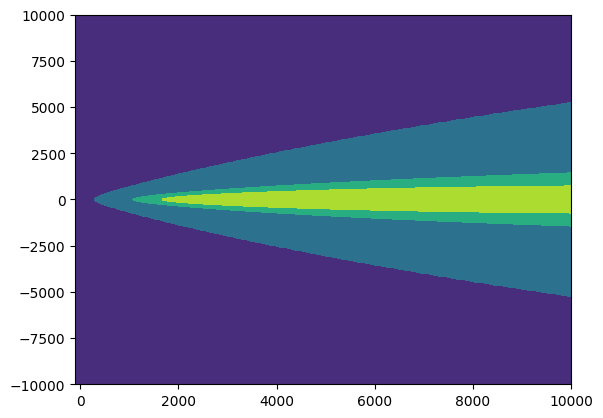

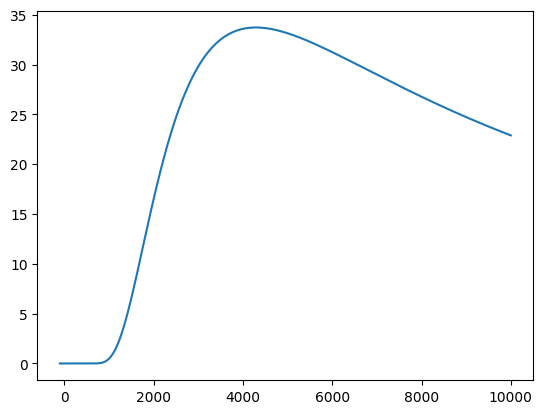

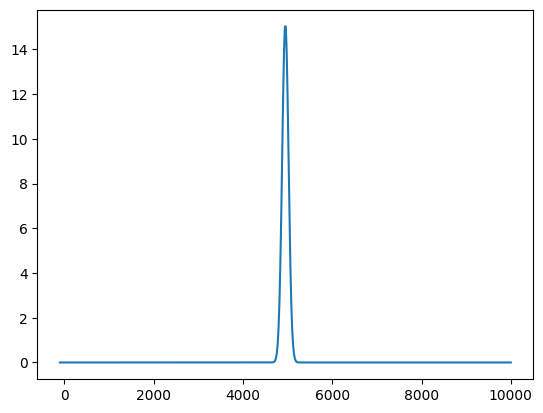

In [32]:
# Criando domínio de modelagem
x = np.linspace(-100,10000,500)
# print(x)
y = np.linspace(-10000,10000,500)
# print(y)

# Criando matrizes de x e y
xx,yy = np.meshgrid(x,y)
# print(xx.shape)

# Adotando inputs
classe = 'D'
urbOrRural = 'rural'
hg = 150 #altura geométrica da chaminé
qs = 100
sigmaY = 10
sigmaZ = 15
u = 10
y = 0
z = 1.5 
d = 1 #m
vs = 10 #m/s
Ts = 300 #Kelvin
Tamb = 293 #20 Celcius

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY,sigmaZ = sigmaXY(xx,classe,urbOrRural)
print(sigmaY)

if vs>1.5*u:
    #Estimando a sobrelevação da pluma (deltaH)
    deltaH = deltaHdavidsonBryant(d, vs, u, Ts, Tamb)
    print('deltaH = ' + str(deltaH))
    hef = hg + deltaH
    print('a pluma subiu')
else:
    hef = hg + 2*d*((vs/u)-1.5)
    print('a pluma caiu')

# Utilizando a matriz de yy como input na função do modelo Gussiano
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,yy,z,hef)

# Visualização dos resultados no espaço
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig,ax = plt.subplots()
ax.contourf(xx,yy,conc+0.1,norm = LogNorm())

# Corte em y - sobre o eixo x
fig,ax = plt.subplots()
ax.plot(x,conc[250,:])

# Corte em x - sobre o eixo y 
fig,ax = plt.subplots()
ax.plot(x,conc[:,100])